In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import ast
from collections import Counter
from urllib.request import urlopen
from urllib.parse import quote
import time
import seaborn as sns
from sklearn.preprocessing import normalize

# Notebook to analyse extracted data 
Extracted data has been initially filtered and more or standardized

Datasets for analysis are:

- reaction time and temop

- precursors but containing only organic materials and amino acids

# 1. Analysis of rxn temp time data

In [29]:
# Importing rxn_temp_time dataset to pandas dataframe
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\ceder_extract_data'
rxn_temp_time = pd.read_csv(os.path.join(path, 'rxn_temp_time.csv'))
rxn_temp_time.head(10)

,DOI,rxn_temp_time
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r..."
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx..."
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
3,10.1021/acsami.1c07260,"[{'rxn_temp': [180.0], 'rxn_time': None}, {'rx..."
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]"
5,10.1002/pat.4901_no_1,NaN
6,10.1016/j.apcatb.2018.03.027_no_1,NaN
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
8,10.1039/C6NR06558A,"[{'rxn_temp': [200.0], 'rxn_time': None}, {'rx..."
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"


In [31]:
# rel_dois = rxn_temp_time['DOI'].to_list()
# with open(os.path.join(path, 'rel_dois.txt'),'w') as file:
#     file.write('\n'.join(doi for doi in rel_dois))

In [3]:
print(f'Number of data points: {rxn_temp_time.shape[0]}')
num_missing_cells = rxn_temp_time['rxn_temp_time'].isna().sum()
print(f'Number of data points where no heating operation was identified: {num_missing_cells}')

Number of data points: 1905
Number of data points where no heating operation was identified: 141


In [4]:
#Dropping cells without data
df_drop = rxn_temp_time.dropna()
df_drop['rxn_temp_time'] = df_drop['rxn_temp_time'].apply(ast.literal_eval)
df_drop.head(10)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DOI,rxn_temp_time
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r..."
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx..."
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
3,10.1021/acsami.1c07260,"[{'rxn_temp': [180.0], 'rxn_time': None}, {'rx..."
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]"
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
8,10.1039/C6NR06558A,"[{'rxn_temp': [200.0], 'rxn_time': None}, {'rx..."
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t..."
11,10.1016/j.diamond.2023.109702,"[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]"


In [5]:
# Filtering out data points where both time and temp are reported
def filter_complete(values):
    new_values = []
    for value in values:
        if value['rxn_temp'] is None or value['rxn_time'] is None:
            continue
        else:
            new_values.append(value)
    if not new_values:
        return None
    else:
        return new_values

df_drop['complete_pairs'] = df_drop['rxn_temp_time'].apply(filter_complete)
df_drop.head(10)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DOI,rxn_temp_time,complete_pairs
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...","[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r..."
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...","[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx..."
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
3,10.1021/acsami.1c07260,"[{'rxn_temp': [180.0], 'rxn_time': None}, {'rx...",None
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]"
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
8,10.1039/C6NR06558A,"[{'rxn_temp': [200.0], 'rxn_time': None}, {'rx...",None
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t...","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"
11,10.1016/j.diamond.2023.109702,"[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]"


In [6]:
df_drop_pairs = df_drop.dropna()
df_drop_pairs.head(10)

,DOI,rxn_temp_time,complete_pairs
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...","[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r..."
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...","[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx..."
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]"
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t...","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"
11,10.1016/j.diamond.2023.109702,"[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]"
13,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]"
15,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...","[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140..."


### Exploring ranges of rxn temp and time

In [7]:
# Compiling all rxn temps and times into lists
rxn_temp_time_values = df_drop_pairs['complete_pairs'].to_list()
rxn_temps = []
rxn_times = []
for value in rxn_temp_time_values:
    for element in value:
        rxn_temps.extend(element['rxn_temp'])
        rxn_times.extend(element['rxn_time'])

### Analysis of rxn temps

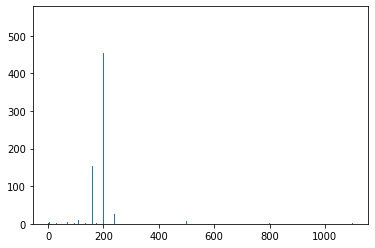

In [8]:
#Visualising occurence of temps
temps_counts = Counter(rxn_temps)
x_temp_val = list(temps_counts.keys())
y_temp_val = list(temps_counts.values())

plt.bar(x = x_temp_val, height = y_temp_val)
plt.show()

A large portion rxn temp is around 200

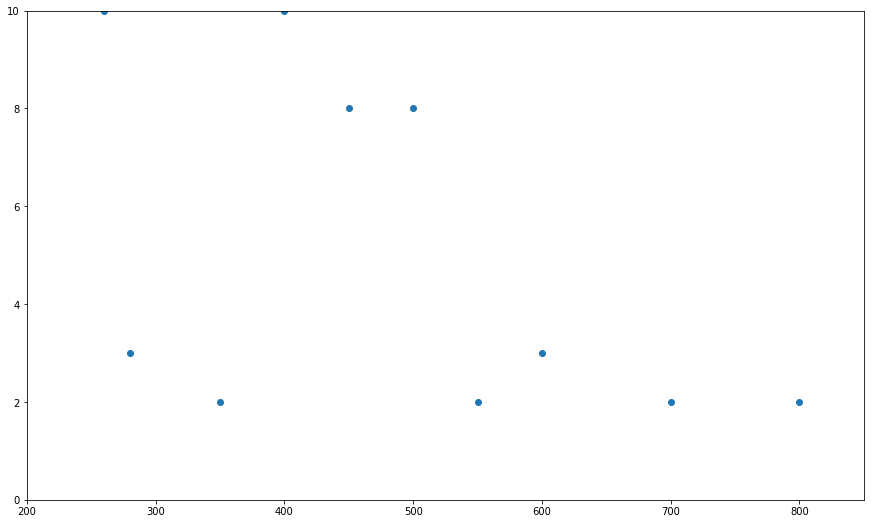

In [9]:
plt.figure(figsize = (15,9) )
plt.scatter(x_temp_val, y_temp_val)
plt.xlim([200,850])
plt.ylim([0,10])
plt.show()

Temperatures below 50 (or 100) should be dropped as they may not be hydrothermal steps or extraction errors but first the corresponding DOIs need to be investigated

In [10]:
# Retrieving DOIs with reports of temps below 100
def find_below_100(values):
    for value in values:
        for temp in value['rxn_temp']:
            if temp < 100:
                return True
        else:
            return False
df_drop_pairs['temp_below_100'] = df_drop_pairs['complete_pairs'].apply(find_below_100)
df_drop_pairs.head(10)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,DOI,rxn_temp_time,complete_pairs,temp_below_100
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...","[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...",False
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...","[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...",True
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]",False
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]",True
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]",False
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]",False
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t...","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]",False
11,10.1016/j.diamond.2023.109702,"[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]",True
13,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]",False
15,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...","[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...",False


In [11]:
doi_below_100 = df_drop_pairs.loc[df_drop_pairs['temp_below_100'] == True, 'DOI'].to_list()
print(doi_below_100)
print(len(doi_below_100))

['10.1002/cssc.201700474', '10.1002/pat.4901_no_0', '10.1016/j.diamond.2023.109702', '10.1016/j.jcis.2015.12.001_no_1', '10.1007/s11356-018-3821-1_no_0', '10.1007/s10854-023-09929-z', '10.1039/D0NR01004A_no_2', '10.1016/j.msec.2017.03.178', '10.1016/j.snb.2015.09.065', '10.1002/adhm.202300146', '10.1007/s00604-019-3501-y', '10.1007/s00604-020-04287-7', '10.1021/IE402421S', '10.3390/s16101720', '10.1021/acsami.7b07667_no_1', '10.1039/D0NJ03375H_no_3', '10.1039/C9RA08477K', '10.1039/C4TA00860J', '10.1016/j.cej.2017.09.011_no_0', '10.1039/D1BM01077H_no_1', '10.1080/01496395.2018.1462832', '10.1002/smll.201900296_no_2', '10.1038/s41598-017-05540-5', '10.1016/j.molliq.2018.03.054', '10.1021/acsabm.2c00664', '10.1016/j.apsusc.2021.150526', '10.3390/ijms21218073_no_0', '10.1039/D1RA07634E', '10.1007/s10854-018-9237-3_no_2', '10.1007/s11051-017-3914-7', '10.1002/adbi.201800009_no_17', '10.1007/s10570-014-0485-y', '10.1002/aenm.201900945_no_0', '10.1007/s10853-021-06606-6', '10.1021/acsami.1c16

Notable examples:
10.1007/s11051-017-3914-7, 10.1002/cssc.201700474, 10.1016/j.snb.2015.09.065

Data points with temps below 100 C can be dropped as they are either ramp rate values or intervals for a temp range or are referring to a different step in the synthesis process and not the hydrothermal treatment

In [12]:
# Data points with rxn above 500
def temp_above_500(values):
    for value in values:
        for temp in value['rxn_temp']:
            if temp >500:
                return True
            else:
                return False
df_drop_pairs['temp_above_500'] = df_drop_pairs['complete_pairs'].apply(temp_above_500)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
# Data points with rxn above 240
def temp_above_240(values):
    for value in values:
        for temp in value['rxn_temp']:
            if temp >240:
                return True
            else:
                return False
df_drop_pairs['temp_above_240'] = df_drop_pairs['complete_pairs'].apply(temp_above_240)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [14]:
doi_above_240 = df_drop_pairs.loc[df_drop_pairs['temp_above_240'] == True, 'DOI'].to_list()
print(doi_above_240)
print(len(doi_above_240))

['10.1021/acsami.7b14029_no_1', '10.1039/C5RA16080D', '10.1039/D1RA01318A', '10.1016/j.jallcom.2018.06.272', '10.1016/j.apsusc.2015.07.095', '10.1038/s41598-017-11347-1', '10.1007/s10971-019-05141-w', '10.1039/C6AY00142D', '10.1039/D0NJ04447D', '10.1021/ac303613d_no_0', '10.1080/1539445X.2017.1368558_no_0', '10.1007/s11051-022-05665-3_no_1', '10.1039/C5TC01156F', '10.1007/s12034-020-02326-w', '10.1039/C5RA00089K', '10.1016/j.carbon.2019.02.040', '10.1039/C4NR04267K', '10.1007/s00289-019-03015-3', '10.1039/C9TB00681H', '10.1002/bio.3935_no_0', '10.1021/acsami.0c17492', '10.1039/C5NR00783F_no_0', '10.1002/bio.3444', '10.3390/nano12203696_no_1', '10.3390/jcs6090260_no_0', '10.1021/acs.langmuir.1c01264', '10.1007/s10895-019-02448-3', '10.3390/catal12101281', '10.1007/s00604-019-3277-0', '10.1016/j.talanta.2015.04.015', '10.1021/ACS.JPCC.5B08724', '10.1039/C8RA01085D', '10.3390/nano9101500', '10.1039/C8NJ02126K', '10.3390/CHEMOSENSORS9080191', '10.1039/C4RA11704B', '10.1039/C5RA26521E', '10

In [15]:
doi_above_500 = df_drop_pairs.loc[df_drop_pairs['temp_above_500'] == True, 'DOI'].to_list()
print(doi_above_500)
print(len(doi_above_500))

['10.1021/acsami.7b14029_no_1', '10.1039/D1RA01318A', '10.1007/s10971-019-05141-w', '10.3390/separations10020137', '10.1002/cssc.202102390']
5


Reaction temps above 500 can also be dropped as they are usually calcination steps and there are only 5 entries with temps above 500. However higher temps at around 500 are potentially not hydrothermal reactions

### Analsysis of rxn times

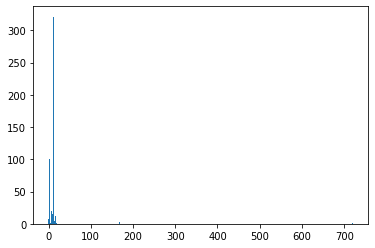

In [16]:
# Visualising occurences of rxn times
times_counts = Counter(rxn_times)
x_time_val = list(times_counts.keys())
y_time_val = list(times_counts.values())

plt.bar(x = x_time_val, height = y_time_val)
plt.show()


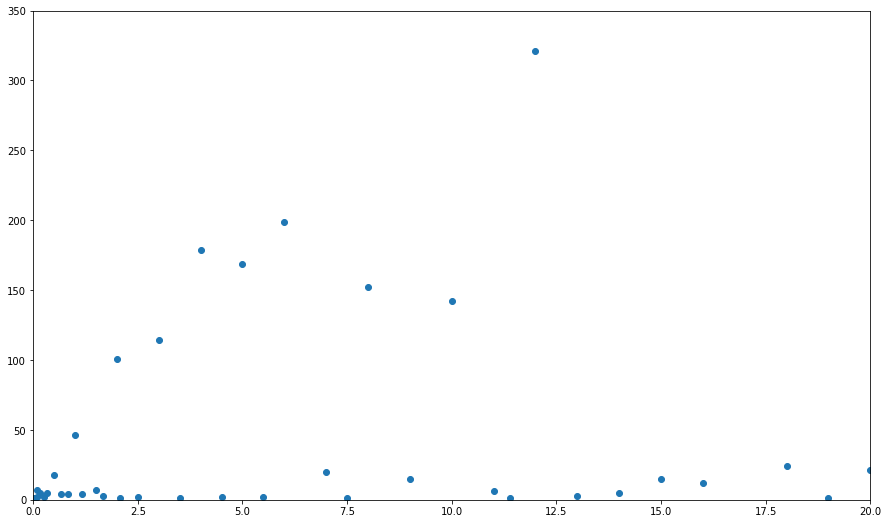

In [17]:
plt.figure(figsize = (15,9) )
plt.scatter(x_time_val, y_time_val)
plt.xlim([0,20])
plt.ylim([0,350])
plt.show()

Rxn times below 0.5 hr and above 100 hours may potentially be dropped as errors. Need to look at corresponding DOIs

In [18]:
#Retreiving DOIs with rxn times below 0.5hr and above 100 hours
def below_half_above_100(values):
    for value in values:
        for time in value['rxn_time']:
            if time < 0.5 or time > 100:
                return True
        else:
            return False
df_drop_pairs['unusual_times'] = df_drop_pairs['complete_pairs'].apply(below_half_above_100)
df_drop_pairs.head(10)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,DOI,rxn_temp_time,complete_pairs,temp_below_100,temp_above_500,temp_above_240,unusual_times
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...","[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...",False,False,False,False
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...","[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...",True,False,False,False
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]",False,False,False,False
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]",True,False,False,False
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]",False,False,False,False
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]",False,False,False,False
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t...","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]",False,False,False,False
11,10.1016/j.diamond.2023.109702,"[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]",True,False,False,False
13,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]",False,False,False,False
15,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...","[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...",False,False,False,False


In [19]:
dois_unusual_times = df_drop_pairs.loc[df_drop_pairs['unusual_times'] == True, 'DOI'].to_list()
print(len(dois_unusual_times))
print(dois_unusual_times)

21
['10.1016/j.optmat.2018.04.039', '10.1021/ACSSUSCHEMENG.7B02941', '10.1007/s00604-019-3270-7', '10.1016/j.talanta.2014.10.008', '10.3390/molecules24020344_no_0', '10.1021/acs.inorgchem.0c01243_no_0', '10.1021/acs.inorgchem.0c01243_no_1', '10.1007/s12034-020-02326-w', '10.3390/ijms21218073_no_0', '10.1039/C4NR01585A_no_0', '10.1039/C3NJ01320K_no_0', '10.3390/ma9030184', '10.1016/j.msec.2017.11.034', '10.1080/10667857.2022.2085441', '10.1039/C6NJ02107G', '10.1039/C7TB01139C', '10.1021/acsami.5b04866', '10.1007/s13205-020-02518-5', '10.1039/C9NR01678C', '10.1039/D1MA00860A', '10.1039/C9NJ04232F']


Notable examples: 10.1016/j.optmat.2018.04.039, 10.1021/ACSSUSCHEMENG.7B02941, 10.1007/s00604-019-3270-7, 10.1007/s12034-020-02326-w

Data points with times below 0.5 hour can be dropped as these are usually times from other processes or time to obtain heating temp

In [20]:
def above_100hr(values):
    for value in values:
        for time in value['rxn_time']:
            if time > 100:
                return True
        else:
            return False
df_drop_pairs['above_100hr'] = df_drop_pairs['complete_pairs'].apply(above_100hr)
doi_above_100hr = df_drop_pairs.loc[df_drop_pairs['above_100hr'] == True, 'DOI'].to_list()
print(len(doi_above_100hr))
print(doi_above_100hr)

3
['10.1021/acs.inorgchem.0c01243_no_0', '10.1021/acs.inorgchem.0c01243_no_1', '10.1039/C4NR01585A_no_0']


C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Reaction times above 100hr can also be dropped as there are only 2 reports where the heating lasted for 7 days and longer and therefore isnt't a common practice

In [21]:
# Dropping data points with reaction temps below 100 and reaction times below 0.5h and above 100 h
def filter_temp_times(values):
    new_values = []
    for value in values:
        temp_val = 1
        time_val = 1
        for time in value['rxn_time']:
            if time < 0.5 or time > 100.0:
                time_val = 0
        for temp in value['rxn_temp']:
            if temp < 100.0 or temp > 500.0:
                temp_val = 0
        if temp_val == 1 and time_val == 1:
            new_values.append(value)
    if not new_values:
        return None
    else:
        return new_values
                
df_drop_pairs['filtered_pairs'] = df_drop_pairs['complete_pairs'].apply(filter_temp_times)
df_drop_pairs.head(15)

C:\Users\Piotr\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DOI,rxn_temp_time,complete_pairs,temp_below_100,temp_above_500,temp_above_240,unusual_times,above_100hr,filtered_pairs
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...","[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}]"
1,10.1002/cssc.201700474,"[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...","[{'rxn_temp': [10.0], 'rxn_time': [3.0]}, {'rx...",True,False,False,False,False,None
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
4,10.1002/pat.4901_no_0,"[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [80.0], 'rxn_time': [4.0]}]",True,False,False,False,False,None
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]",False,False,False,False,False,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t...","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]",False,False,False,False,False,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"
11,10.1016/j.diamond.2023.109702,"[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [2.0], 'rxn_time': [6.0]}]",True,False,False,False,False,None
13,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]"
15,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...","[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...",False,False,False,False,False,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140..."


In [22]:
df_clean = df_drop_pairs.dropna()
df_clean.head(15)

,DOI,rxn_temp_time,complete_pairs,temp_below_100,temp_above_500,temp_above_240,unusual_times,above_100hr,filtered_pairs
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...","[{'rxn_temp': [200.0], 'rxn_time': [8.0]}, {'r...",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}]"
2,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
7,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
9,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]",False,False,False,False,False,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
10,10.1016/j.snb.2016.10.043,"[{'rxn_temp': None, 'rxn_time': None}, {'rxn_t...","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]",False,False,False,False,False,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"
13,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]"
15,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...","[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...",False,False,False,False,False,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140..."
16,10.3390/PR9010170,"[{'rxn_temp': [180.0], 'rxn_time': [6.0]}, {'r...","[{'rxn_temp': [180.0], 'rxn_time': [6.0]}]",False,False,False,False,False,"[{'rxn_temp': [180.0], 'rxn_time': [6.0]}]"
17,10.1016/j.matpr.2022.06.321,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]",False,False,False,False,False,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
19,10.1021/acs.analchem.5b04193,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]","[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]",False,False,False,False,False,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"


In [23]:
df_clean.shape

(1469, 9)

In [94]:
rxn_temp_time_df = pd.DataFrame(columns=['DOI', 'rxn_temp_time'])
rxn_temp_time_df['DOI'] = df_clean['DOI'].to_list()
rxn_temp_time_df['rxn_temp_time'] = df_clean['filtered_pairs'].to_list()
rxn_temp_time_df.head(10)

,DOI,rxn_temp_time
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}]"
1,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
2,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
3,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
4,10.1016/j.snb.2016.10.043,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"
5,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]"
6,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140..."
7,10.3390/PR9010170,"[{'rxn_temp': [180.0], 'rxn_time': [6.0]}]"
8,10.1016/j.matpr.2022.06.321,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
9,10.1021/acs.analchem.5b04193,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"


In [96]:
#saving clean dataframe to csv
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\ceder_extract_data'
filename = 'clean_rxn_temp_time.csv'
rxn_temp_time_df.to_csv(os.path.join(path, filename), index=False)

## Pretty plots
Code to make pretty plots for report and presentations

In [2]:
#Importing csv and getting rxn time and temp as counts
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\ceder_extract_data'
filename = 'clean_rxn_temp_time.csv'
temp_time_df = pd.read_csv(os.path.join(path, filename))
temp_time_df['rxn_temp_time'] = temp_time_df['rxn_temp_time'].apply(ast.literal_eval)
rxn_temp_time_values = temp_time_df['rxn_temp_time'].to_list()
rxn_temps = []
rxn_times = []
for value in rxn_temp_time_values:
    for element in value:
        rxn_temps.extend(element['rxn_temp'])
        rxn_times.extend(element['rxn_time'])
temp_time_df.head(10)

,DOI,rxn_temp_time
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}]"
1,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]"
2,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
3,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]"
4,10.1016/j.snb.2016.10.043,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"
5,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]"
6,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140..."
7,10.3390/PR9010170,"[{'rxn_temp': [180.0], 'rxn_time': [6.0]}]"
8,10.1016/j.matpr.2022.06.321,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]"
9,10.1021/acs.analchem.5b04193,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]"


In [23]:
def get_descriptive_statistics(values):
    # Convert the list to a numpy array
    np_values = np.array(values)

    # Calculate descriptive statistics
    mean = np.mean(np_values)
    median = np.median(np_values)
    std_deviation = np.std(np_values)
    min_value = np.min(np_values)
    max_value = np.max(np_values)

    # Calculate quartiles
    quartiles = np.percentile(np_values, [25, 50, 75])

    # Return the results as a dictionary
    statistics = {
        'mean': mean,
        'median': median,
        'std_deviation': std_deviation,
        'min_value': min_value,
        'max_value': max_value,
        'q1': quartiles[0],
        'q2': quartiles[1],
        'q3': quartiles[2],
    }

    return statistics

In [24]:
def plot_distribution(x_values, y_values, xlabel, ylabel, title, x_limits=None, y_limits=None, x_tick_frequency=None, width=None, height=None, save_file = None):
    # Create a figure and axis with custom size if provided
    if width is not None and height is not None:
        fig, ax = plt.subplots(figsize=(width, height))
    else:
        fig, ax = plt.subplots()

    # Plot the distribution
    ax.bar(x_values, y_values, color='skyblue', edgecolor='black')

    # Add labels and title
    ax.set_xlabel(xlabel, fontsize = 20)
    ax.set_ylabel(ylabel, fontsize = 20)
    ax.set_title(title, fontsize = 24)

    # Customize the appearance
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)

    # Set x and y limits if provided
    if x_limits is not None:
        ax.set_xlim(x_limits)
    if y_limits is not None:
        ax.set_ylim(y_limits)

    # Set x tick frequency if provided
    if x_tick_frequency is not None:
        ax.xaxis.set_major_locator(plt.MultipleLocator(x_tick_frequency))
    
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    plt.tight_layout()
    
    if save_file is not None:
        plt.savefig(save_file)

    # Show the plot
    plt.show()

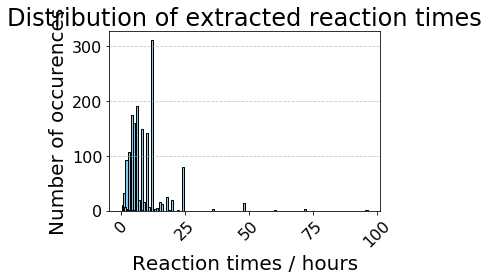

In [27]:
#Plotting distribution of rxn times
times_counts = Counter(rxn_times)
x_time_val = list(times_counts.keys())
y_time_val = list(times_counts.values())

x_label = 'Reaction times / hours'
y_label = 'Number of occurences'
title = 'Distribution of extracted reaction times'
plot_distribution(x_time_val, y_time_val, x_label, y_label, title)

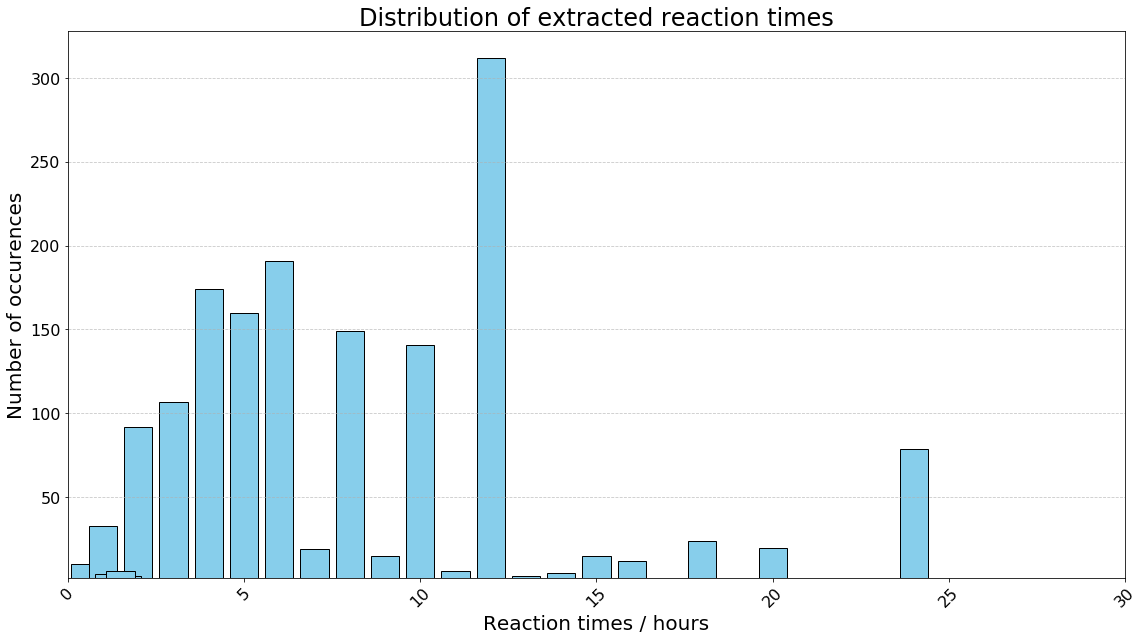

In [28]:
#Plotting distribution of rxn times
times_counts = Counter(rxn_times)
x_time_val = list(times_counts.keys())
y_time_val = list(times_counts.values())

x_label = 'Reaction times / hours'
y_label = 'Number of occurences'
title = 'Distribution of extracted reaction times'
x_limit = (0,30)
x_tick_frequency = 2
plot_distribution(x_time_val, y_time_val, x_label, y_label, title, x_limit, x_tick_frequency, width = 16, height = 9)

In [29]:
#Calculating mean, median and std_dev on reaction times
stats = get_descriptive_statistics(rxn_times)
stats

{'mean': 8.91951174289246,
 'median': 7.0,
 'std_deviation': 7.707777135930941,
 'min_value': 0.5,
 'max_value': 96.0,
 'q1': 4.0,
 'q2': 7.0,
 'q3': 12.0}

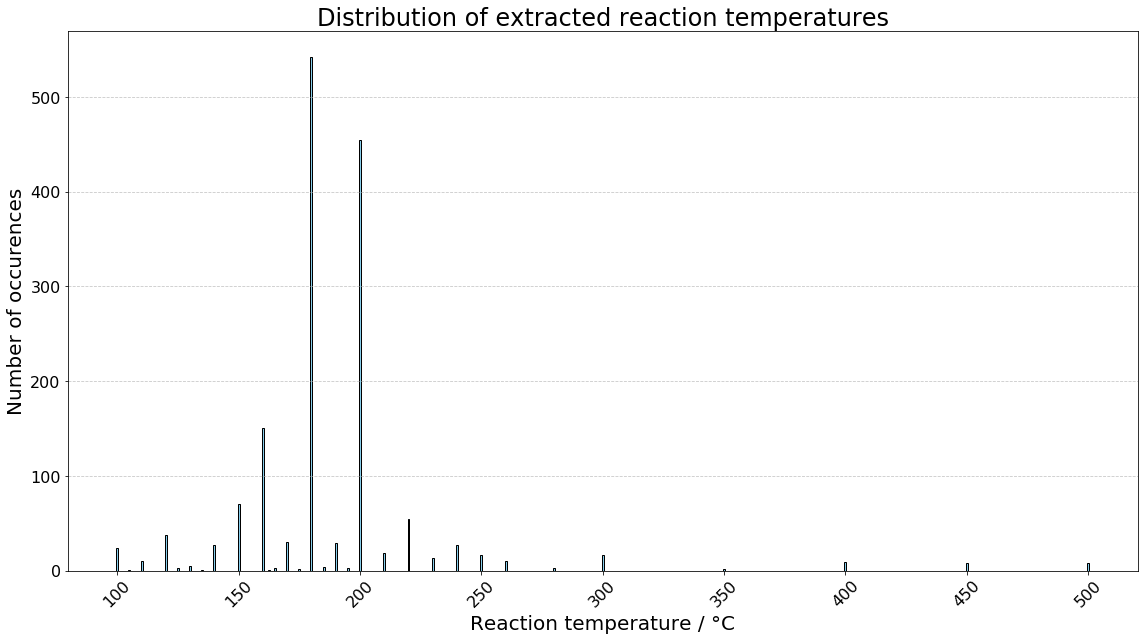

In [30]:
#Plotting distribution of rxn temps
temps_counts = Counter(rxn_temps)
x_temp_val = list(temps_counts.keys())
y_temp_val = list(temps_counts.values())

x_label = 'Reaction temperature / °C'
y_label = 'Number of occurences'
title = 'Distribution of extracted reaction temperatures'
plot_distribution(x_temp_val, y_temp_val, x_label, y_label, title, width = 16, height = 9)

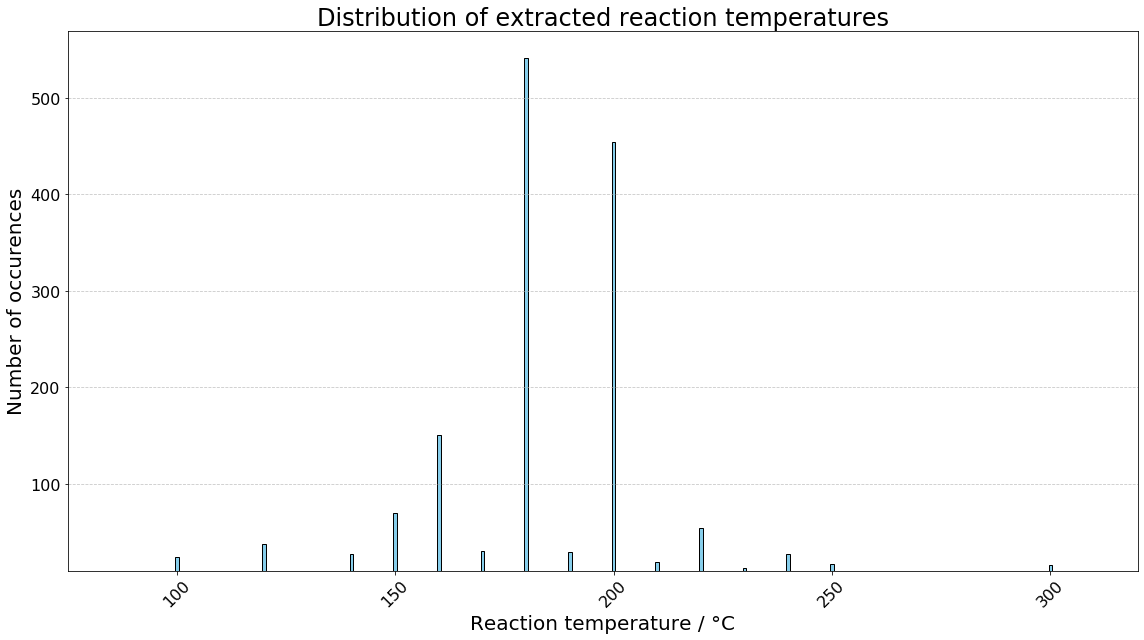

In [31]:
#Plotting distribution of rxn temps
temps_counts = Counter(rxn_temps)
x_temp_val = list(temps_counts.keys())
y_temp_val = list(temps_counts.values())

x_label = 'Reaction temperature / °C'
y_label = 'Number of occurences'
title = 'Distribution of extracted reaction temperatures'
x_limit = (75,320)
x_tick_frequency = 10
plot_distribution(x_temp_val, y_temp_val, x_label, y_label, title,  x_limit, x_tick_frequency, width = 16, height = 9)

In [32]:
#Calculating mean, median and std_dev on reaction temps
stats = get_descriptive_statistics(rxn_temps)
stats

{'mean': 188.63478535353536,
 'median': 180.0,
 'std_deviation': 44.54546659618809,
 'min_value': 100.0,
 'max_value': 500.0,
 'q1': 180.0,
 'q2': 180.0,
 'q3': 200.0}

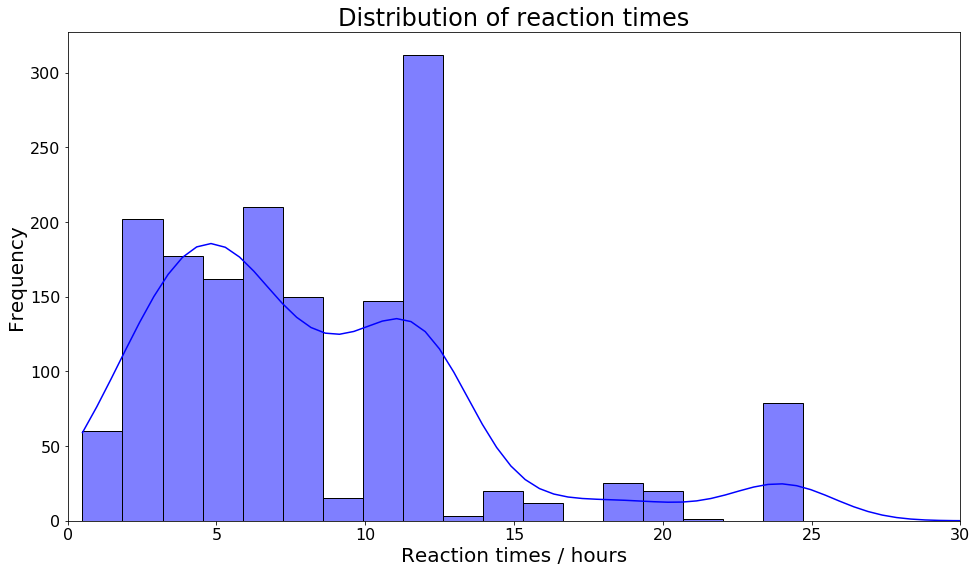

In [27]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.histplot(rxn_times, kde=True, color='blue')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_xlim((0,30))
plt.xlabel('Reaction times / hours', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Distribution of reaction times', fontsize = 24)
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\plots'
plt.savefig(os.path.join(path,'time_distrib.png'),dpi=300, bbox_inches = "tight")

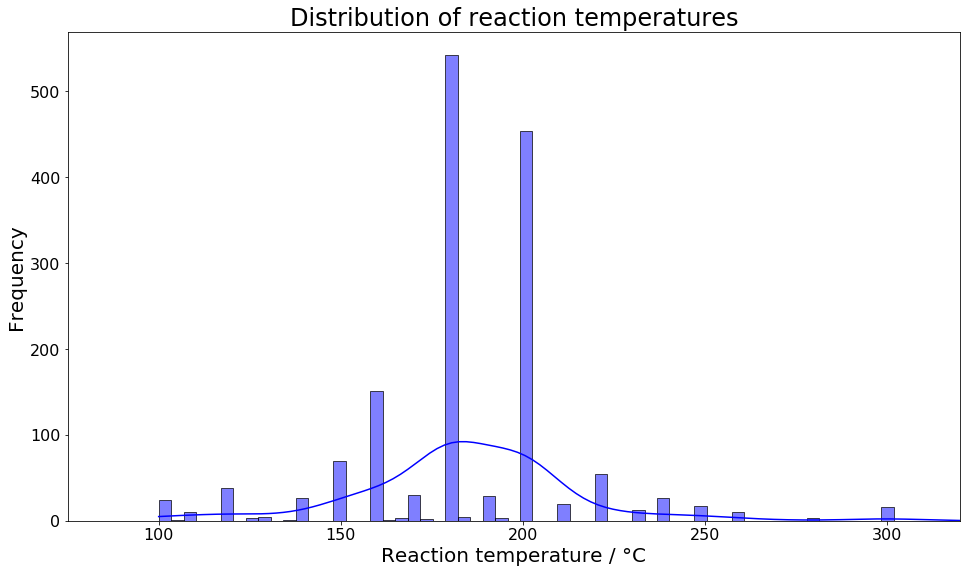

In [26]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.histplot(rxn_temps, kde=True, color='blue')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_xlim((75,320))
plt.xlabel('Reaction temperature / °C', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Distribution of reaction temperatures', fontsize = 24)
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\plots'
plt.savefig(os.path.join(path,'temp_distrib.png'),dpi=300, bbox_inches = "tight")

In [3]:
#Plotting reaction temp vs time, converting data to tuples (temp, time) for each temp entry

def temp_time_tuple(values):
    tuples = []
    for entry in values:
        for temp in entry['rxn_temp']:
            for time in entry['rxn_time']:
                tuples.append((temp,time))
    return tuples

temp_time_df['temp_time_tuples'] = temp_time_df['rxn_temp_time'].apply(temp_time_tuple)
temp_time_df.head(10)

,DOI,rxn_temp_time,temp_time_tuples
0,10.1039/D1FO03426J,"[{'rxn_temp': [200.0], 'rxn_time': [8.0]}]","[(200.0, 8.0)]"
1,10.1007/s13399-020-00839-2_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [24.0]}]","[(200.0, 24.0)]"
2,10.1039/D0NR09131F,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[(200.0, 2.0)]"
3,10.1039/D1AY00762A,"[{'rxn_temp': [180.0], 'rxn_time': [4.0]}]","[(180.0, 4.0)]"
4,10.1016/j.snb.2016.10.043,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]","[(180.0, 12.0)]"
5,10.1039/D2AN01232D_no_0,"[{'rxn_temp': [200.0], 'rxn_time': [6.0]}]","[(200.0, 6.0)]"
6,10.1039/C8RA02226G_no_0,"[{'rxn_temp': [220.0, 200.0, 180.0, 160.0, 140...","[(220.0, 16.0), (220.0, 14.0), (220.0, 12.0), ..."
7,10.3390/PR9010170,"[{'rxn_temp': [180.0], 'rxn_time': [6.0]}]","[(180.0, 6.0)]"
8,10.1016/j.matpr.2022.06.321,"[{'rxn_temp': [200.0], 'rxn_time': [2.0]}]","[(200.0, 2.0)]"
9,10.1021/acs.analchem.5b04193,"[{'rxn_temp': [180.0], 'rxn_time': [12.0]}]","[(180.0, 12.0)]"


In [4]:
all_tuples = temp_time_df['temp_time_tuples'].to_list()
temp_time = [item for sublist in all_tuples for item in sublist]
x_temp = [item[0] for item in temp_time]
y_time = [item[1] for item in temp_time]
print(x_temp[:10])
print(y_time[:10])
len(x_temp) == len(y_time)
len(x_temp)

[200.0, 200.0, 200.0, 180.0, 180.0, 200.0, 220.0, 220.0, 220.0, 220.0]
[8.0, 24.0, 2.0, 4.0, 12.0, 6.0, 16.0, 14.0, 12.0, 10.0]


1728

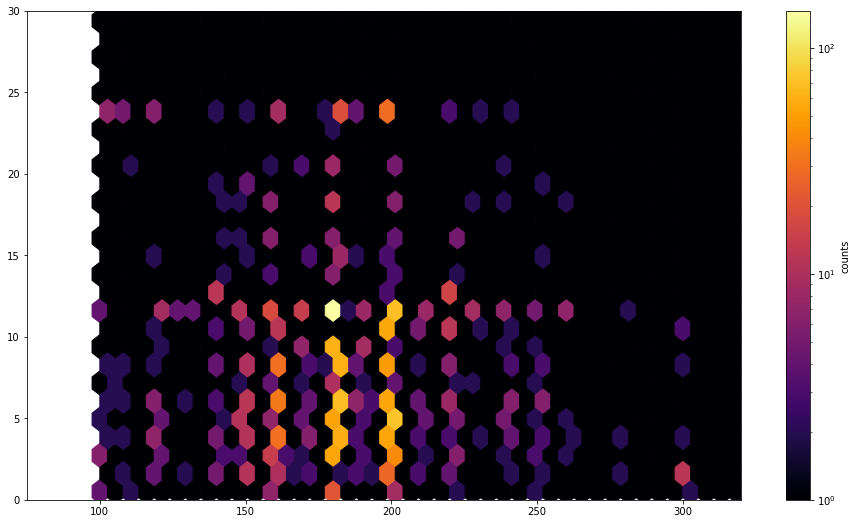

In [27]:
# xlim = x_temp.min(), x_temp.max()
# ylim = y_time.min(), y_temp.max()
fig, ax = plt.subplots(figsize=(16, 9))
hb = ax.hexbin(x_temp, y_time, gridsize =75,bins = 'log',cmap = 'inferno')
ax.set(xlim = (75,320), ylim = (0,30))
cb = fig.colorbar(hb, ax = ax, label = 'counts')
plt.show()

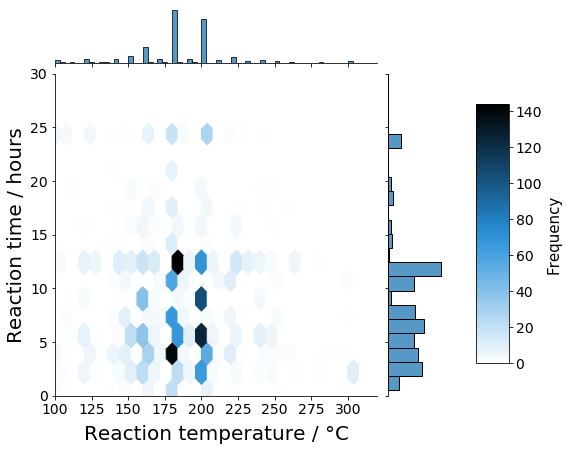

In [36]:
# fig, ax = plt.subplots()
plot = sns.jointplot(x = x_temp, y=y_time, kind='hex',xlim = (100,320), ylim=(0,30), height = 9)
# ax.set(xlim = (100,320), ylim=(0,30))
plt.xlabel('Reaction temperature / °C', fontsize = 20, labelpad = 8)
plt.ylabel('Reaction time / hours', fontsize  =20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbar_ax = plot.fig.add_axes([.85, .25, .05, .4]) 
cb = plt.colorbar(cax = cbar_ax)
# cb = plt.colorbar(cax=cbar_ax).set_label(label='Frequency',size=15).ax.tick_params(labelsize = 14)
cb.set_label(label = 'Frequency', size = 15)
cb.ax.tick_params(labelsize = 14)
# cbar.set_label(label='Frequency',size=15)
# cbar.set_label('Frequency', size = 14 )
# plt.colorbar().ax.tick_params(labelsize = 14)
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\plots'
plt.savefig(os.path.join(path,'temp_time_distrib.png'),dpi=300, bbox_inches = "tight")
plt.show()

In [83]:
x_temp_norm = normalize([x_temp])
y_time_norm = normalize([y_time])
len(x_temp_norm.tolist())

1

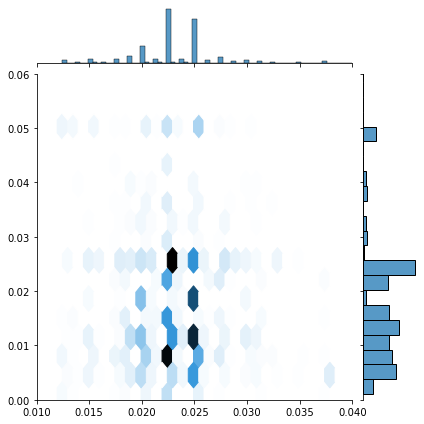

In [86]:
plot = sns.jointplot(x = x_temp_norm.tolist()[0], y=y_time_norm.tolist()[0], kind='hex', xlim = (0.01, 0.04), ylim = (0,0.06) )

# 2. Analysis of org amino precursors

In [10]:
# Importing org_amino_precursors data into dataframe
# path = '/Users/pnt17/Library/CloudStorage/OneDrive-ImperialCollegeLondon/MRes_project_data/ceder_extract_data'
path =  r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\ceder_extract_data'
filename = 'org_amino_pre.csv'
org_amino_df = pd.read_csv(os.path.join(path, filename), encoding='utf-8')
org_amino_df['precursors'] = org_amino_df['precursors'].apply(ast.literal_eval)
org_amino_df.head(10)

,DOI,precursors
0,10.1039/D1FO03426J,[]
1,10.1002/cssc.201700474,[citric acid]
2,10.1007/s13399-020-00839-2_no_0,[ethanol]
3,10.1021/acsami.1c07260,[calcein]
4,10.1002/pat.4901_no_0,"[citric acid, N-(2-aminoethyl)-3-aminopropyldi..."
5,10.1002/pat.4901_no_1,"[citric acid, N-(2-aminoethyl)-3-aminopropyldi..."
6,10.1016/j.apcatb.2018.03.027_no_1,"[citric acid, thiourea]"
7,10.1039/D0NR09131F,"[p-phenylenediamine, ascorbic acid]"
8,10.1039/C6NR06558A,[]
9,10.1039/D1AY00762A,"[penicillamine, ascorbic acid]"


In [11]:
org_amino_df.shape

(1905, 2)

In [12]:
# Filtering out common solvents
def drop_solvents(values):
    solvents = ['ethanol', 'DMF', 'acetone']
    new_values = [value for value in values if value not in solvents]
    return new_values

org_amino_df['precursors'] = org_amino_df['precursors'].apply(drop_solvents)
org_amino_df.head(10)

,DOI,precursors
0,10.1039/D1FO03426J,[]
1,10.1002/cssc.201700474,[citric acid]
2,10.1007/s13399-020-00839-2_no_0,[]
3,10.1021/acsami.1c07260,[calcein]
4,10.1002/pat.4901_no_0,"[citric acid, N-(2-aminoethyl)-3-aminopropyldi..."
5,10.1002/pat.4901_no_1,"[citric acid, N-(2-aminoethyl)-3-aminopropyldi..."
6,10.1016/j.apcatb.2018.03.027_no_1,"[citric acid, thiourea]"
7,10.1039/D0NR09131F,"[p-phenylenediamine, ascorbic acid]"
8,10.1039/C6NR06558A,[]
9,10.1039/D1AY00762A,"[penicillamine, ascorbic acid]"


In [13]:
# Converting empty lists to None values
def no_precursors(values):
    if not values:
        return None
    else:
        return values

org_amino_df['precursors'] = org_amino_df['precursors'].apply(no_precursors)
org_amino_df.head(10)

,DOI,precursors
0,10.1039/D1FO03426J,None
1,10.1002/cssc.201700474,[citric acid]
2,10.1007/s13399-020-00839-2_no_0,None
3,10.1021/acsami.1c07260,[calcein]
4,10.1002/pat.4901_no_0,"[citric acid, N-(2-aminoethyl)-3-aminopropyldi..."
5,10.1002/pat.4901_no_1,"[citric acid, N-(2-aminoethyl)-3-aminopropyldi..."
6,10.1016/j.apcatb.2018.03.027_no_1,"[citric acid, thiourea]"
7,10.1039/D0NR09131F,"[p-phenylenediamine, ascorbic acid]"
8,10.1039/C6NR06558A,None
9,10.1039/D1AY00762A,"[penicillamine, ascorbic acid]"


In [14]:
#Dropping empty cells
org_amino_df = org_amino_df.dropna()
org_amino_df.shape

(1341, 2)

In [15]:
#saving to csv
# org_amino_df.to_csv(os.path.join(path, 'precursors_clean.csv'), index = False)

In [16]:
# Distribution of precursors used
all_precursors = [pre for value in org_amino_df['precursors'].to_list() for pre in value]
print(len(all_precursors))

2281


In [17]:
precursor_counts = Counter(all_precursors)
pre_dis = pd.DataFrame.from_records(list(dict(precursor_counts).items()),columns = ['precursor', 'count'])
pre_dis_sorted = pre_dis.sort_values(by=['count'], ascending=False)
pre_dis_sorted.head(50)

,precursor,count
0,citric acid,453
18,ethylenediamine,185
17,urea,151
40,glucose,73
8,o-phenylenediamine,69
41,PEI,50
3,thiourea,48
4,p-phenylenediamine,48
45,cysteine,44
5,ascorbic acid,32


In [18]:
# Number of all precursors extracted, the number of distinct org and amino names from the raw extraction was 873!!
pre_dis.shape[0]

433

In [19]:
# Saving all precursor names to list
# with open(os.path.join(path,'all_precursor_names.txt'), 'w', encoding='utf=8') as file:
#     file.write('\n'.join(pre for pre in pre_dis['precursor'].to_list()))

In [20]:
# Precursors with counts equal or above 5
pre_5_df = pre_dis[pre_dis['count'] >= 5]
print(pre_5_df.shape)
top_20 = pre_5_df.sort_values(by=['count'], ascending=False).head(20)
pre_5_df.sort_values(by=['count'], ascending=False).head(20)

(63, 2)


,precursor,count
0,citric acid,453
18,ethylenediamine,185
17,urea,151
40,glucose,73
8,o-phenylenediamine,69
41,PEI,50
4,p-phenylenediamine,48
3,thiourea,48
45,cysteine,44
5,ascorbic acid,32


In [22]:
top_20['precursor'].to_list()

['citric acid',
 'ethylenediamine',
 'urea',
 'glucose',
 'o-phenylenediamine',
 'PEI',
 'p-phenylenediamine',
 'thiourea',
 'cysteine',
 'ascorbic acid',
 'ammonium citrate',
 'PEG',
 'acetic acid',
 'm-phenylenediamine',
 'folic acid',
 'EDTA',
 '1,3,6-trinitropyrene',
 'sucrose',
 'PVP',
 'pyrene']

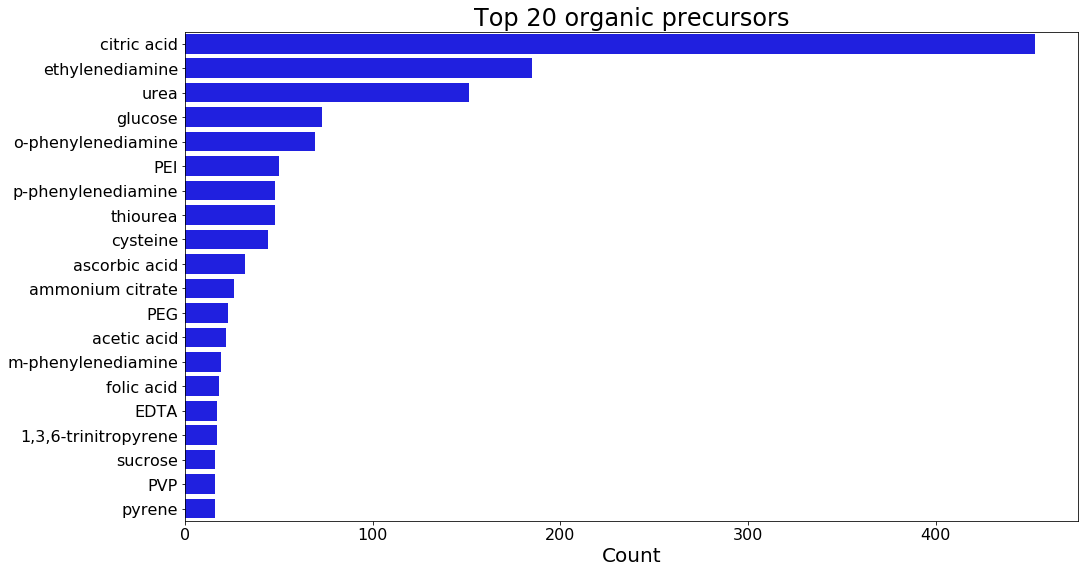

In [20]:
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\plots'
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x = 'count', y = 'precursor', data = top_20, color = 'blue')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set(ylabel=None)
plt.xlabel('Count', fontsize = 20)
plt.title('Top 20 organic precursors', fontsize = 24)
plt.savefig(os.path.join(path,'top_20_pre.png'),dpi=300, bbox_inches = "tight")

In [180]:
# Precursors that appear 3 or less times
pre_below_3_df = pre_dis[pre_dis['count'] <=3 ]
pre_below_3_df.shape

(351, 2)

In [181]:
# Getting smiles representation for all precursors

#importing precursor names
with open(os.path.join(path, 'all_precursor_names.txt'), 'r', encoding = 'utf-8') as file:
    all_precursor_names = file.read().splitlines()
print(len(all_precursor_names))

433


In [182]:
def convert_to_SMILES(name):
    '''
    Function that converts chemical name to SMILES representation using Chemical Identifier Resolver API
    '''
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(name) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return None

In [183]:
test_set = ['citric acid', 'ionic liquid', 'etoposide', 'PVP', 'folic acid']
for compound in test_set:
    print(compound, convert_to_SMILES(compound))

citric acid OC(=O)CC(O)(CC(O)=O)C(O)=O
ionic liquid None
etoposide COc1cc(cc(OC)c1O)[C@H]2[C@@H]3C(COC3=O)[C@H](O[C@@H]4O[C@@H]5CO[C@@H](C)O[C@H]5[C@H](O)[C@H]4O)c6cc7OCOc7cc26
PVP P[V]P
folic acid NC1=Nc2ncc(CNc3ccc(cc3)C(=O)N[C@@H](CCC(O)=O)C(O)=O)nc2C(=O)N1


In [184]:
pre_dis['SMILES'] = pre_dis['precursor'].apply(convert_to_SMILES)

In [185]:
pre_dis.head(20)

,precursor,count,SMILES
0,citric acid,453,OC(=O)CC(O)(CC(O)=O)C(O)=O
1,calcein,1,OC(=O)CN(CC(O)=O)Cc1cc2c(Oc3cc(O)c(CN(CC(O)=O)...
2,N-(2-aminoethyl)-3-aminopropyldimethoxysilane,2,CO[SiH](CCCNCCN)OC
3,thiourea,48,NC(N)=S
4,p-phenylenediamine,48,Nc1ccc(N)cc1
5,ascorbic acid,32,OCC(O)C1OC(=C(O)C1=O)O
6,penicillamine,1,CC(C)(S)[C@H](N)C(O)=O
7,aminobenzoic acid,1,Nc1ccccc1C(O)=O
8,o-phenylenediamine,69,Nc1ccccc1N
9,dodecylamine,3,CCCCCCCCCCCCN


In [188]:
failed_smiles = pre_dis[pre_dis['SMILES'].values == None]['precursor'].to_list()
print(len(failed_smiles))
pre_dis[pre_dis['SMILES'].values == None]

24


,precursor,count,SMILES
38,ionic liquid,13,None
39,polyamidoamine,2,None
69,PVA,4,None
85,lignin,13,None
93,cellulose,13,None
105,cyclodextrin,7,None
156,dextran sulfate,1,None
160,alginic acid,2,None
162,superphenalene,1,None
194,dimethyloctadecyl[3-(trimethoxysilyl)propy]amm...,2,None


In [190]:
# Saving precursor name and smiles to csv
# pre_dis.to_csv(os.path.join(path, 'precursor_smiles.csv'), columns = ['precursor', 'SMILES'], encoding='utf-8', index=False)